#Python Clustering Algorithms

Credit where credit is due: https://github.com/lmcinnes/hdbscan/blob/master/notebooks/Comparing%20Clustering%20Algorithms.ipynb

In [13]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline

#define some plotting characteristics
sns.set_context('poster')
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

In [14]:
data = np.load('clusterable_data.npy')

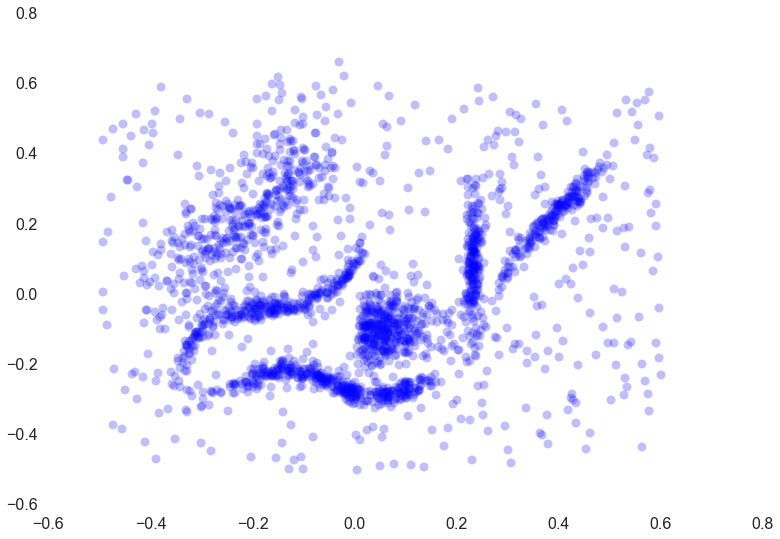

In [15]:
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
plt.xticks = []
plt.yticks = []

##Define clustering method

In [16]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    plt.xticks = []
    plt.yticks = []
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

##K-Means

K-Means is the 'go-to' clustering algorithm for many simply because it is fast, easy to understand, and available everywhere (there's an implementation in almost any statistical or machine learning tool you care to use). K-Means has a few problems however. The first is that it isn't a clustering algorithm, it is a partitioning algorithm. That is to say K-means doesn't 'find clusters' it partitions your dataset into as many (assumed to be globular) chunks as you ask for by attempting to minimize intra-partition distances. That leads to the second problem: you need to specify exactly how many clusters you expect. 

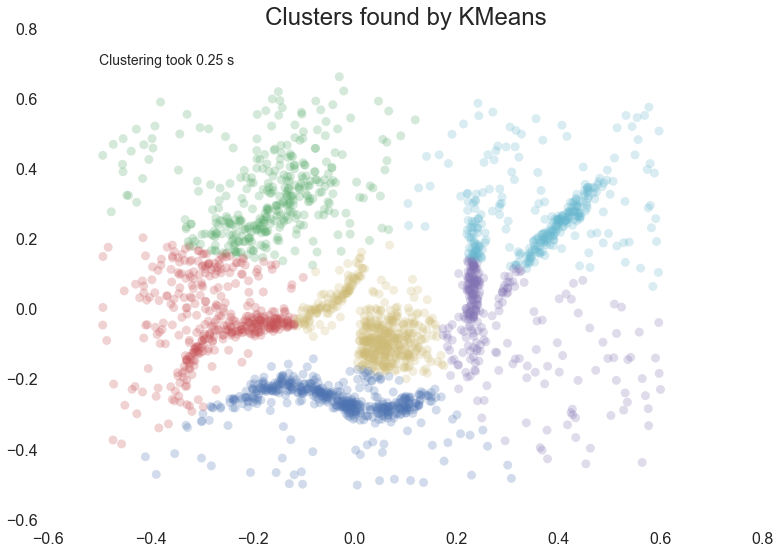

In [19]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':6})

We see some interesting results. First, the assumption of perfectly globular clusters means that the natural clusters have been spliced and clumped into various more globular shapes. Worse, the noise points get lumped into clusters as well: in some cases, due to where relative cluster centers ended up, points very distant from a cluster get lumped in. Having noise pollute your clusters like this is particularly bad in an EDA world since they can easily mislead your intuition and understanding of the data. On a more positive note we completed clustering very quickly indeed, so at least we can be wrong quickly.

##HDBSCAN

In [21]:
#import hdbscan
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':15})

NameError: name 'hdbscan' is not defined